 <h1>Finding a king with most wins</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/battles.csv")
df.head(10)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [3]:
kings = pd.Series(df["attacker_king"].append(df["defender_king"].reset_index(drop=True)).unique())
kings.dropna(inplace = True)
kings

0    Joffrey/Tommen Baratheon
1                  Robb Stark
2         Balon/Euron Greyjoy
3           Stannis Baratheon
5             Renly Baratheon
6                Mance Rayder
dtype: object

In [4]:
outcomes = df[["name", "attacker_king", "defender_king", "attacker_outcome"]]
outcomes.head(3)

,name,attacker_king,defender_king,attacker_outcome
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win


In [5]:
attwin = outcomes[outcomes.attacker_outcome == "win"]["attacker_king"]
attwin.dropna(inplace = True)
attwin

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


0     Joffrey/Tommen Baratheon
1     Joffrey/Tommen Baratheon
2     Joffrey/Tommen Baratheon
4                   Robb Stark
5                   Robb Stark
6     Joffrey/Tommen Baratheon
7          Balon/Euron Greyjoy
8          Balon/Euron Greyjoy
9          Balon/Euron Greyjoy
10                  Robb Stark
11         Balon/Euron Greyjoy
12         Balon/Euron Greyjoy
13    Joffrey/Tommen Baratheon
14                  Robb Stark
15           Stannis Baratheon
17                  Robb Stark
18                  Robb Stark
20                  Robb Stark
23    Joffrey/Tommen Baratheon
24    Joffrey/Tommen Baratheon
25    Joffrey/Tommen Baratheon
26                  Robb Stark
28    Joffrey/Tommen Baratheon
30           Stannis Baratheon
31         Balon/Euron Greyjoy
32         Balon/Euron Greyjoy
33    Joffrey/Tommen Baratheon
34    Joffrey/Tommen Baratheon
35    Joffrey/Tommen Baratheon
36    Joffrey/Tommen Baratheon
Name: attacker_king, dtype: object

In [6]:
defwin = outcomes[outcomes.attacker_outcome == "loss"]["defender_king"]
defwin.dropna(inplace = True)
defwin

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


3     Joffrey/Tommen Baratheon
16                  Robb Stark
19    Joffrey/Tommen Baratheon
21    Joffrey/Tommen Baratheon
27                Mance Rayder
Name: defender_king, dtype: object

In [7]:
winnerkings = defwin.append(attwin).reset_index(drop=True)
winnerkings

0     Joffrey/Tommen Baratheon
1                   Robb Stark
2     Joffrey/Tommen Baratheon
3     Joffrey/Tommen Baratheon
4                 Mance Rayder
5     Joffrey/Tommen Baratheon
6     Joffrey/Tommen Baratheon
7     Joffrey/Tommen Baratheon
8                   Robb Stark
9                   Robb Stark
10    Joffrey/Tommen Baratheon
11         Balon/Euron Greyjoy
12         Balon/Euron Greyjoy
13         Balon/Euron Greyjoy
14                  Robb Stark
15         Balon/Euron Greyjoy
16         Balon/Euron Greyjoy
17    Joffrey/Tommen Baratheon
18                  Robb Stark
19           Stannis Baratheon
20                  Robb Stark
21                  Robb Stark
22                  Robb Stark
23    Joffrey/Tommen Baratheon
24    Joffrey/Tommen Baratheon
25    Joffrey/Tommen Baratheon
26                  Robb Stark
27    Joffrey/Tommen Baratheon
28           Stannis Baratheon
29         Balon/Euron Greyjoy
30         Balon/Euron Greyjoy
31    Joffrey/Tommen Baratheon
32    Jo

In [8]:
winnerkings.value_counts()

Joffrey/Tommen Baratheon    16
Robb Stark                   9
Balon/Euron Greyjoy          7
Stannis Baratheon            2
Mance Rayder                 1
dtype: int64

In [9]:

kingsscores = pd.DataFrame({"kings_name":[], "number_of_wins": []})
i = 0
for king in kings:
    if king in winnerkings.value_counts():
        kingsscores.loc[df.index[i],["kings_name"]] = king
        kingsscores.loc[df.index[i],["number_of_wins"]] = winnerkings.value_counts()[king]
    else:
        kingsscores.loc[df.index[i],["kings_name"]] = king
        kingsscores.loc[df.index[i],["number_of_wins"]] = 0
    i +=1

kingsscores

,kings_name,number_of_wins
0,Joffrey/Tommen Baratheon,16.0
1,Robb Stark,9.0
2,Balon/Euron Greyjoy,7.0
3,Stannis Baratheon,2.0
4,Renly Baratheon,0.0
5,Mance Rayder,1.0


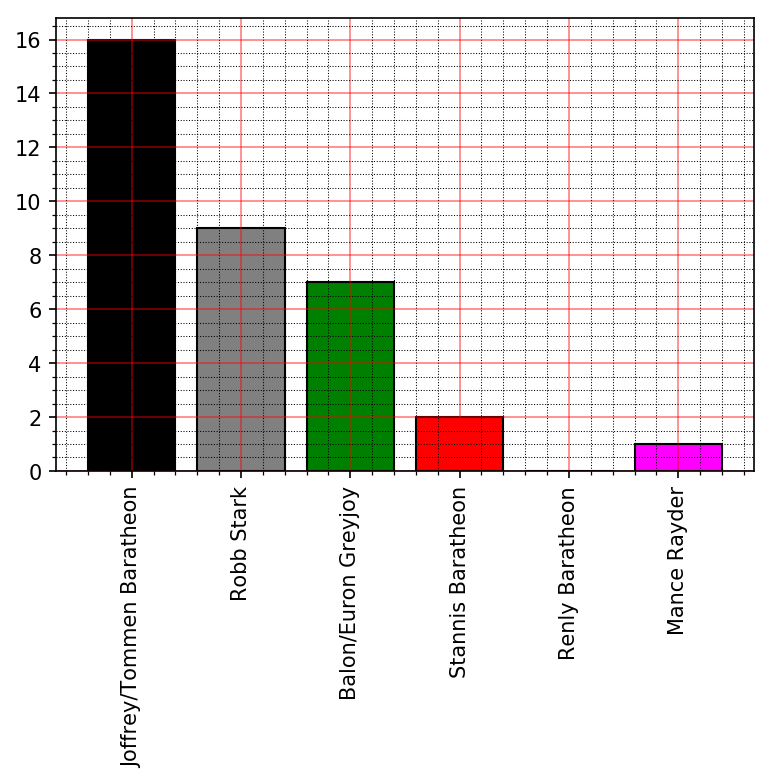

In [10]:
plt.figure(dpi = 150)
plt.bar(kingsscores["kings_name"], kingsscores["number_of_wins"], 
        color = ["k", "grey", "green", "red", "gold", "magenta"],
        edgecolor = "k",
       )
plt.xticks(kings, rotation = "vertical")
plt.minorticks_on()
plt.grid(which = "minor", linestyle = ":", linewidth = 0.5, color = "k")
plt.grid(color = "red", alpha = 0.5)